In [89]:
import numpy as np
import pandas as pd


# download dataframe
data = pd.read_csv('Bitcoin_2014-2022.csv',index_col=0)
data.index = pd.to_datetime(data.index)
log_returns = pd.DataFrame(np.diff(np.log(data['Close'])),index=data.index[1:],columns=['Log_Returns'])

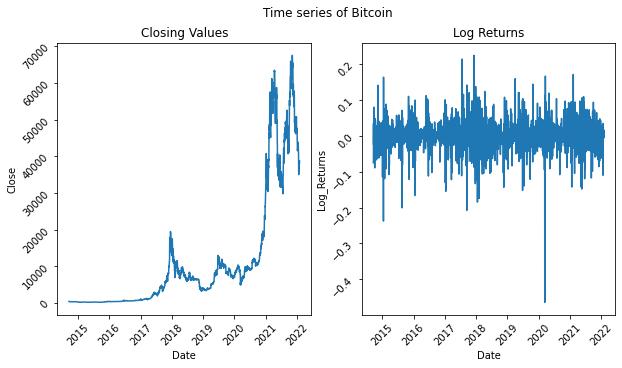

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axs = plt.subplots(1,2, figsize=(10, 5), squeeze=True)
sns.lineplot(x=data.index, y='Close', data=data, ax=axs[0])
sns.lineplot(x=log_returns.index, y='Log_Returns', data=log_returns,ax=axs[1])

axs[0].title.set_text('Closing Values')
axs[0].tick_params(labelrotation=45)

axs[1].title.set_text('Log Returns')
axs[1].tick_params(labelrotation=45)

fig.suptitle('Time series of Bitcoin')
plt.show()

c:\users\g_man\onedrive\depaul\monte carlo algorithms\assignments\cryptocurrency monte carlo simulation\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 0.98, 'AutoCorrelation Plots')

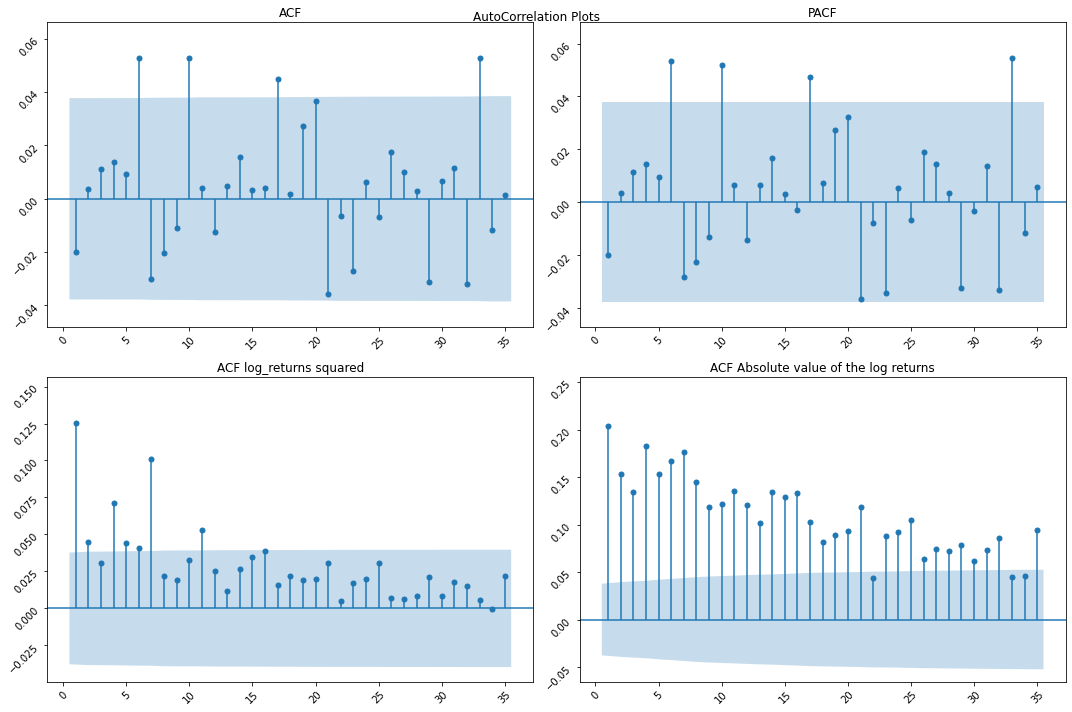

In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axs = plt.subplots(2,2, figsize=(15, 10), squeeze=True)
plot_acf(log_returns, ax=axs[0,0], zero=False, auto_ylims=True)
plot_pacf(log_returns, ax=axs[0,1], zero=False, auto_ylims=True)
plot_acf(log_returns**2, ax=axs[1,0], zero=False, auto_ylims=True)
plot_acf(abs(log_returns), ax=axs[1,1], zero=False, auto_ylims=True)


axs[0,0].title.set_text('ACF')
axs[0,0].tick_params(labelrotation=45)

axs[0,1].title.set_text('PACF')
axs[0,1].tick_params(labelrotation=45)

axs[1,0].title.set_text('ACF log_returns squared')
axs[1,0].tick_params(labelrotation=45)

axs[1,1].title.set_text('ACF Absolute value of the log returns')
axs[1,1].tick_params(labelrotation=45)
fig.tight_layout()
fig.suptitle('AutoCorrelation Plots')

In [206]:
import pmdarima as arima
from arch import arch_model

arima_model_fitted = arima.auto_arima(log_returns)
arima_residuals = pd.DataFrame(arima_model_fitted.arima_res_.resid,index=log_returns.index)

model = arch_model(arima_residuals, vol='GARCH', p=1, q=1)
fitted_model = model.fit()
fitted_model.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.2689763846430062e+18
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2.9884399526975074e+19
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5108.5983859210355
            Iterations: 2
            Function evaluations: 28
            Gradient evaluations: 2


c:\users\g_man\onedrive\depaul\monte carlo algorithms\assignments\cryptocurrency monte carlo simulation\venv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001534. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      0   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5108.60
Distribution:                  Normal   AIC:                          -10209.2
Method:            Maximum Likelihood   BIC:                          -10185.6
                                        No. Observations:                 2694
Date:                Sun, Feb 20 2022   Df Residuals:                     2693
Time:                        17:19:24   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.0494e-04  7.924e-04      0.385      0.700 [-1.248e-03,1.858e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.0671e-05  3.667e-06      8.364  6.088e-17 [2.348e-05,3.786e-05]
alpha[1]       0.1000  2.958e-02      3.381  7.235e-04   [4.202e-02,  0.158]
beta[1]        0.8800  2.434e-02     36.158 2.821e-286     [  0.832,  0.928]
============================================================================

Covariance estimator: robust
"""

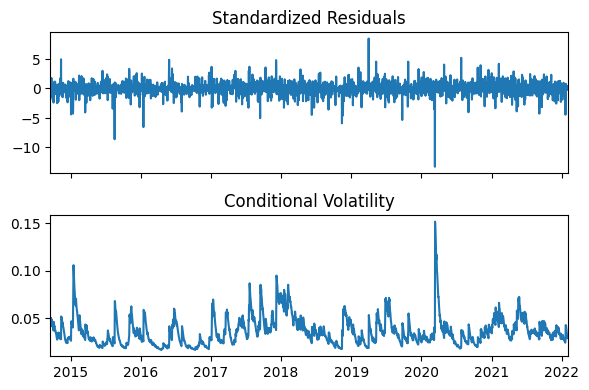

In [207]:
results = fitted_model.plot()
results.tight_layout()
results.set_dpi(100)

In [220]:
# Not sure why I'm not getting anything other than zeros
forecast = fitted_model.forecast(reindex=False)
np.sqrt(forecast.residual_variance.values)

array([[0.0277434]])

In [218]:
#set up empty list to hold our ending values for each simulated price series
T = 365 #Number of trading days
mu = 0.0622 #Return
vol = 0.3737 #Volatility

daily_returns= np.random.normal((1+mu)**(1/T),vol/np.sqrt(T),1)
print(daily_returns)

[1.00205789]
